In [7]:
!pip install --quiet prophet pandas matplotlib seaborn scikit-learn

In [15]:
from google.colab import files
uploaded = files.upload()  # Upload sales_data_sample.csv when prompted

Saving sales_data_sample.csv to sales_data_sample.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from prophet import Prophet
except ImportError:
    from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [17]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
date_col = 'ORDERDATE'   # Change if your date column is different
sales_col = 'SALES'      # Change if your sales column is different

data = df[[date_col, sales_col]].copy()
data[date_col] = pd.to_datetime(data[date_col])
data = data.rename(columns={date_col: 'ds', sales_col: 'y'})
data = data.sort_values('ds')
data.head()

,ds,y
578,2003-01-06,5151.00
680,2003-01-06,3390.00
1267,2003-01-06,1903.22
2024,2003-01-06,1689.03
1539,2003-01-09,1404.00


In [18]:
train = data.iloc[:-90]
test = data.iloc[-90:]

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(train)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpureuz0jb/vxnzmbmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpureuz0jb/vhdw5xd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47572', 'data', 'file=/tmp/tmpureuz0jb/vxnzmbmz.json', 'init=/tmp/tmpureuz0jb/vhdw5xd0.json', 'output', 'file=/tmp/tmpureuz0jb/prophet_modellto4bfqp/prophet_model-20250527190717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:07:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
330,2005-07-31,3698.020936,1332.591141,5979.959505
331,2005-08-01,3673.185162,1360.949152,5995.964968
332,2005-08-02,3826.464317,1527.508214,6180.755128
333,2005-08-03,3601.064773,1455.215068,6022.347957
334,2005-08-04,3800.072779,1535.421210,6079.901122


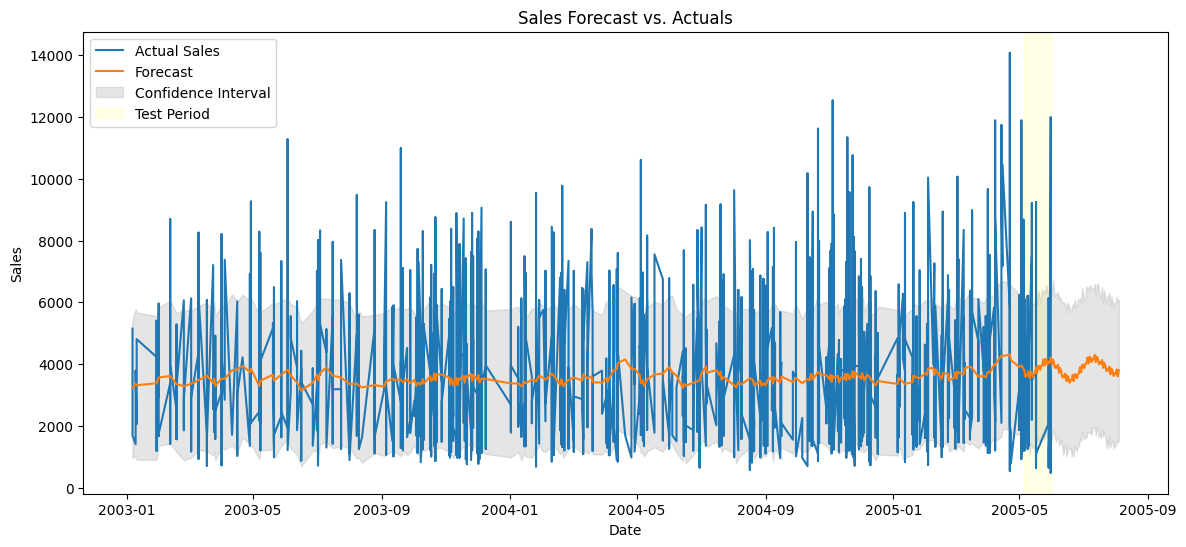

In [19]:
plt.figure(figsize=(14,6))
plt.plot(data['ds'], data['y'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.axvspan(test['ds'].min(), test['ds'].max(), color='yellow', alpha=0.1, label='Test Period')
plt.legend()
plt.title('Sales Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [20]:
test_pred = pd.merge(test, forecast[['ds', 'yhat']], on='ds', how='left')
mae = mean_absolute_error(test_pred['y'], test_pred['yhat'])
rmse = np.sqrt(mean_squared_error(test_pred['y'], test_pred['yhat']))
mape = np.mean(np.abs((test_pred['y'] - test_pred['yhat']) / test_pred['y'])) * 100
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 1758.35
RMSE: 2186.55
MAPE: 86.49%


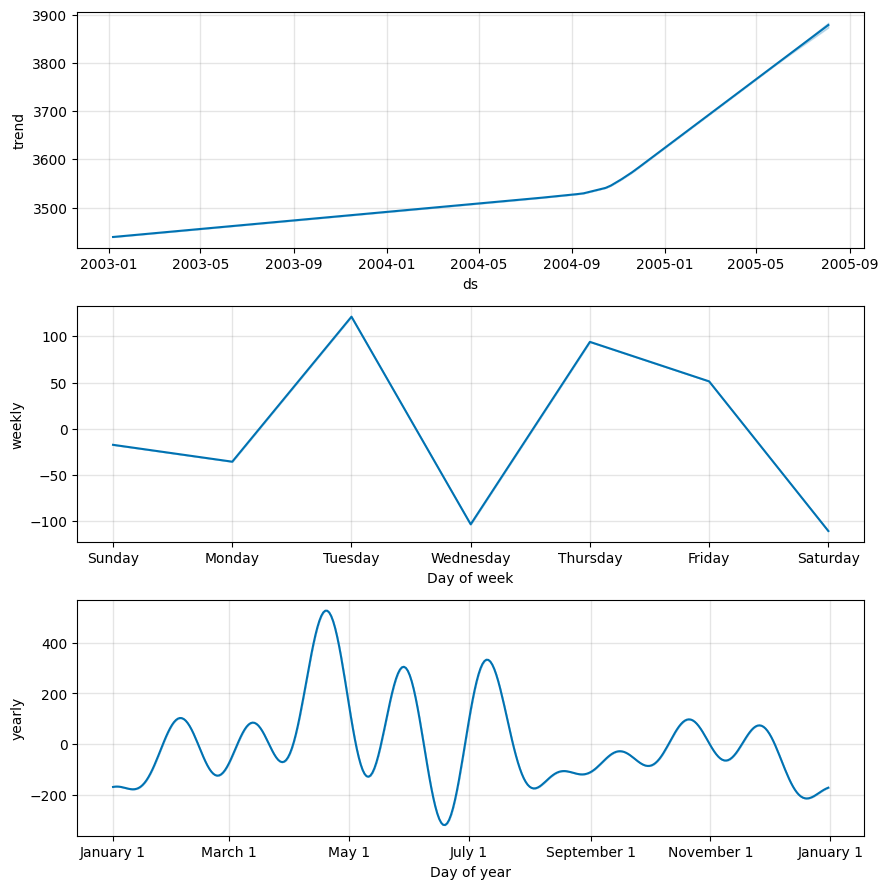

In [21]:
model.plot_components(forecast)
plt.show()